# <center><b>Task-II
---
<h3><center><i>_ Clustering Techniques for the any
customer Dataset_

> Name: <b>BHANUPRAKASH</b><br>Batch:<b> Aug'2023</b>
<hr>


### About Dataset:
<h4>Performing Clustering Technique for the any customer dataset using KMeans<br></h4>
Let's define each variable :
<li>CustomerID: A unique identifier assigned to each customer in the dataset.<br>
<li>	Genre (Gender): It is categorized as "Male" or "Female,".<br>
<li>	Age: The age of the customer.<br>
<li>	Annual Income (k$): This variable indicates the annual              income of each customer in thousands of dollars. It represents            their earnings in a year.<br>
<li>	Spending Score (1-100): This variable is a numerical score between 1 and 100 that indicates the customer's spending              behavior <br><br>
<b>Statement:</b><br> To group customers based on their attributes to identify patterns and tailor marketing strategies accordingly.<br> The "Genre," "Age," "Annual Income," and "Spending Score" are the features used to cluster the customers.

Dataset link:https://www.kaggle.com/datasets/shwetabh123/mall-customers

### Importing required libraries


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

### i) Exploratory Data Analysis

In [3]:
# Loading dataset or dataframe
mall=pd.read_csv("C:/Users/Bhanu/OneDrive/Desktop/Internsavvy/Mall_Customers.csv")

In [4]:
# Looking for shape of dataframe
mall.shape

(200, 5)

In [5]:
# Viewing columns
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Head of the dataframe
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Tail of the dataframe

mall.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
# Datatypes involved..
mall.dtypes.value_counts()

int64     4
object    1
dtype: int64

In [9]:
# Information about Dataframe 
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
# Removing white spaces and remaining columns
mall.columns=mall.columns.str.replace(" ","")
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

In [11]:
# renaming columns
mall.columns=mall.rename(columns={'AnnualIncome(k$)':'AnnualIncome',
                                  'SpendingScore(1-100)':'SpendingScore',"Genre":"Gender"}).columns
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [12]:
# Viewing int columns
int_col=mall.select_dtypes(include="int64").columns.tolist()
int_col

['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']

In [13]:
# Viewing categorical columns
cat_col=mall.select_dtypes(include="O").columns.tolist()
cat_col

['Gender']

In [14]:
# Drop the id column
copy_mall=mall.copy()
mall.drop("CustomerID",axis=1,inplace=True)

In [15]:
# Summary statistics
mall.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [1]:
# looking for outliers through boxplot
sb.set({"figure.figsize":(6,5)})
sb.boxplot(mall)
pt.title("Boxplots")
pt.xlabel("Feature Variables")
pt.ylabel("Count")


NameError: name 'sb' is not defined

since,we have one outlier in annual income,we neglet it as it may be the person with higher annual income.

Text(0, 0.5, 'Count')

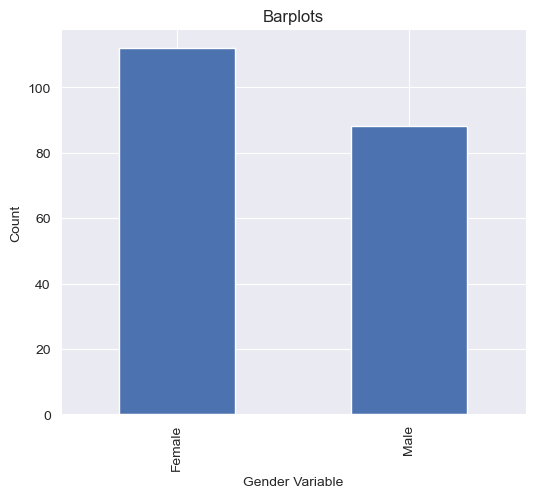

In [17]:
# Plotting gender for count
mall.Gender.value_counts().plot(kind="bar")
pt.title("Barplots")
pt.xlabel("Gender Variable")
pt.ylabel("Count")


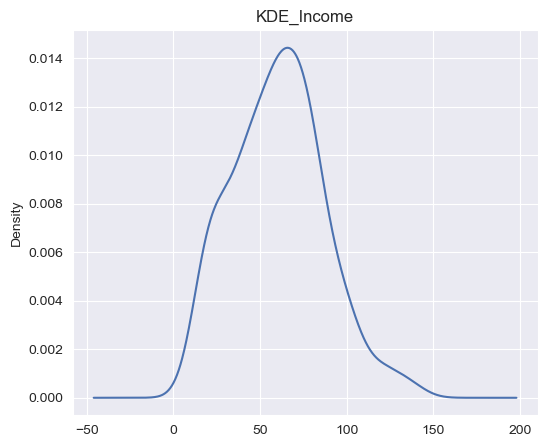

In [18]:
# KDE plot for Annual income
mall.AnnualIncome.plot(kind="kde")
pt.title('KDE_Income')
pt.show()

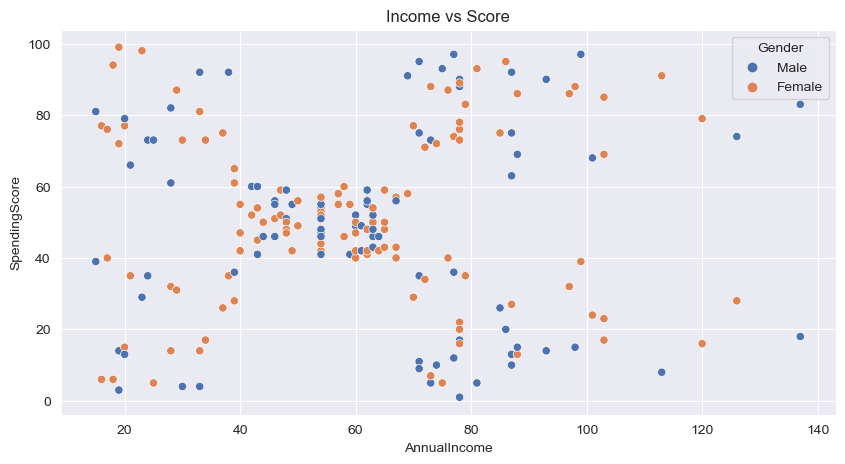

In [19]:
# Scatter plot for the AnnualIncome & SpendingScore
sb.set({"figure.figsize":(10,5)})
sb.scatterplot(data=mall,x='AnnualIncome',y='SpendingScore',hue="Gender")
pt.title('Income vs Score')
pt.show()

~: We can see that most of the customer data points lies at annual income(40-70) and spending score (40-60).

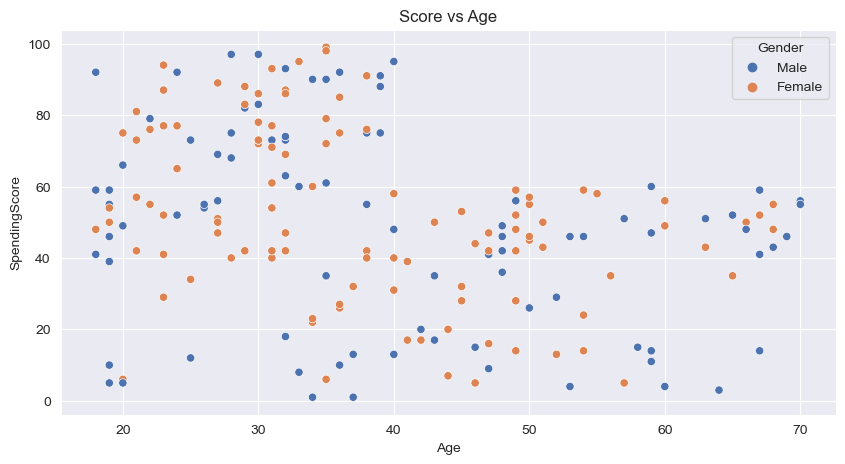

In [20]:
# Scatter plot for the Age & SpendingScore
sb.scatterplot(data=mall,x='Age',y='SpendingScore',hue="Gender")
pt.title('Score vs Age')
pt.show()

~: We interpret that the age (40-60) of having spending score around (20-60),the age (20-40) of having 
higher spending score around (40-100) and the age (60-70) of having balanced spending score around (40-60) respectively .

### ii) Data Preprocessing 

In [21]:
#converting gender to binary
mall.Gender=np.where(mall["Gender"]=="Male",1,0)
mall.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int32

In [22]:
mall.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [23]:
# Scaling desired columns for modelling
scaler=StandardScaler()
scaled_val=scaler.fit_transform(mall[["AnnualIncome","SpendingScore"]])

In [24]:
scaled_val[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [25]:
# Creating a new dataframe with out Gender variable
features=pd.DataFrame(scaled_val,columns=mall.columns[2:4].tolist())
features

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


### iii)  Model Building & Evaluation

In [26]:
# To get optimal number of clusters (K) for KMeans cluster algo..
wcss=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k,random_state=69)     # init function set to default of "k-means++"
    kmeans.fit(features)              # selecting Annual income,Spend score
    wcss.append(kmeans.inertia_)
    
wcss[:6]  #choosing upto 6 values

[399.99999999999994,
 269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386]

~: Here, wcss (within cluster sum of squares ) are variances used to determine the value of "k" using "Elbow Method of plotting".Inertia_ values are sum of the squared distances of samples that are closest to their cluster centers.# simply ,we can say that when clusters increases inertia decreases and adding clustrers doesn't improve the fit or plot.

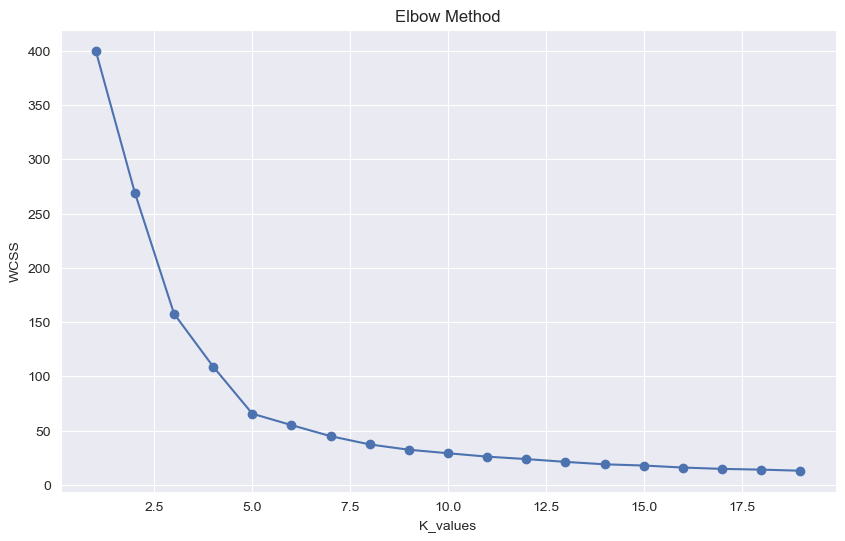

In [27]:
# Plotting of WCSS values using Elbow plot
pt.figure(figsize=(10,6))
pt.plot(range(1,20),wcss,marker="o")

pt.xlabel('K_values')
pt.ylabel('WCSS')
pt.title('Elbow Method')
pt.show()

~:We interpret that, i took the values for k is (1-20) & the line is steadily decreasing as k values increase.so considering elbow at k=5 clusters

In [28]:
# Modelling Kmeans clustring for k=5
kval=5

kmeans=KMeans(n_clusters=kval,max_iter=10,random_state=69)
kmeans.fit(features)


KMeans(max_iter=10, n_clusters=5, random_state=69)

In [29]:
#cluster lables for each datapoint
labels=kmeans.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [30]:
#centroids
centroids=kmeans.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

In [31]:
# WCSS 
e=kmeans.inertia_
e

65.56840815571681

In [32]:
#final required iterations
itr=kmeans.n_iter_
itr

5

In [33]:
# Adding predicted labels to features
new_features=features.assign(clusters=pd.DataFrame(labels))
new_features

,AnnualIncome,SpendingScore,clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


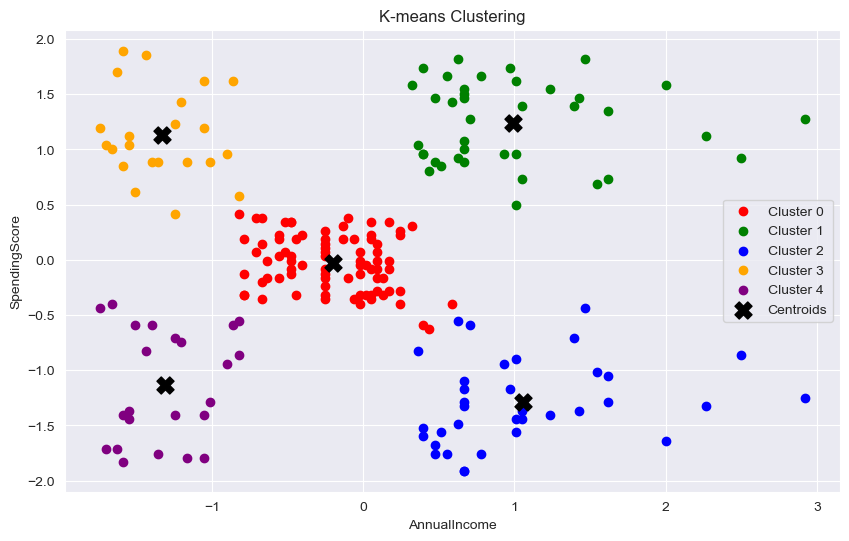

In [34]:
# Plot the clusters based on the labels assigned by K-means
pt.figure(figsize=(10, 6))

# Plot each cluster's data points with different colors
clr=["red","green","blue","orange","purple"]
for cluster_num in range(kval):
    pt.scatter(x=new_features[new_features.clusters == cluster_num]['AnnualIncome'],
               y= new_features[new_features.clusters == cluster_num]['SpendingScore'],marker='o',c=clr[cluster_num]
               ,label=f'Cluster {cluster_num}')

# Plot the cluster centers
pt.scatter(x=centroids[:, 0], y=centroids[:, 1],
            c='black', marker='X', s=150, label='Centroids')

pt.xlabel('AnnualIncome')
pt.ylabel('SpendingScore')
pt.title('K-means Clustering')
pt.legend()
pt.show()

In [36]:
#Evaluation Metric
score=metrics.silhouette_score(features,kmeans.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(score))

Silhouette_Score Coefficient : 0.55


~:Silhouette_Score ranges from  -1 to 1,which near to one is best and nearr to -1 is worst.
    Since we got coffecient as <b><i>0.55</b></i> in which datapoints are very Moderately compact with the clusters.

### Conclusion :

From the entire clustering analysis,it is to be interpreted that,<br>
> <b>Cluster 0 (Red):</b><br> 
>The data points in this cluster represents that the customers with an average annual income tends to have average spending <br>      score(-0.5 to 0.5)..So,these customers are the very balanced ones.<br><br>
> <b>Cluster 1 (Green):</b><br> 
>The data points in this cluster represents that the customers with higher annual income tends to have higher spending <br>      score between (-0.5 to -2).So,these customers are treated as target and more profitable ones to the business domain.<br><br>
> <b>Cluster 2 (Blue):</b><br> 
>The data points in this cluster represents that the customers with an higher annual income tends to have lower spending <br>      score(-2 to -0.5).So,we can treat these customers are well planned and careful ones.<br><br>
> <b>Cluster 3 (Orange):</b><br> 
>The data points in this cluster represents that the customers with lower annual income tends to have higher spending <br>      score(0.4 to 2).So,these customers are the are balanced ones or very careless ones.<br><br>
> <b>Cluster 4 (Purple):</b><br> 
>The data points in this cluster represents that the customers with lower annual income tends to have low spending <br>      score(-0.5 to -2).So,these customers are the very balanced and careful ones.<br><br>



<center>END